<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/correlation_mann_whitney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import scipy.stats as stats
from google.colab import drive


In [23]:
drive.mount('/content/gdrive')

file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"
data = pd.read_csv(file_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [25]:
def perform_tests(data, numeric_columns, group_variable):
    results = []
    group1 = data[data[group_variable] == 0]
    group2 = data[data[group_variable] == 1]

    for var in numeric_columns:
        if var != group_variable:
            # Проверка на нормальность
            stat, p_value_ks = stats.kstest(data[var].dropna(), 'norm', args=(data[var].mean(), data[var].std()))
            normal_distribution = p_value_ks > 0.05

            # Выбор и выполнение теста
            if normal_distribution:
                stat, p_value = stats.ttest_ind(group1[var].dropna(), group2[var].dropna())
                test_used = 't-test'
            else:
                stat, p_value = stats.mannwhitneyu(group1[var].dropna(), group2[var].dropna())
                test_used = 'Mann-Whitney'

            results.append({
                'Переменная': var,
                'Колмогоров-Смирнов p-value': p_value_ks,
                'Распределение': 'нормальное' if normal_distribution else 'ненормальное',
                'Используемый тест': test_used,
                'p-value теста': p_value
            })

    results_df = pd.DataFrame(results)
    return results_df


In [26]:
results_df = perform_tests(data, numeric_columns, 'Интернет ответ')


In [27]:
output_path = "/content/gdrive/My Drive/delite/beta/egg_diploma_test_results.csv"
results_df.to_csv(output_path, index=False)


In [29]:
import pandas as pd
from scipy.stats import kendalltau
from google.colab import drive


In [44]:
variables = ['стаж использования интернета в учебных целях',
             'самооценка навыков использования компьютера',
             'самооценка навыков поиска информации',
             'количество запросов 1','количество просмотренных ссылок 1',
    'Интернет ответ', 'Интернет время', 'Возраст',
             #'Пол',
             'Time-test: Среднее 1 1',
    'Time-test: Среднее время реакции, серия 1 (Часть 2)',
    'Time-test: Среднее время реакции, серия 2 (Часть 1)',
    'Time-test: Среднее время реакции, серия 2 (Часть 2)', 'Time-test: Проп 1 1',
    'Time-test: Количество пропусков, серия 1 (Часть 2)',
    'Time-test: Количество пропусков, серия 2 (Часть 1)',
    'Time-test: Количество пропусков, серия 2 (Часть 2)', 'Time-test: Ош 2 1',
    #'Time-test: Количество ошибок, серия 2 (Часть 2)',
             #'WMem: Количество объектов, серия 1',
    #'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3',
    #'WMem: Время серии 1', 'WMem: Время серии 2', 'WMem: Время серии 3',
    #'Время фиксации на области интереса (тексте)', 'Среднее время фиксации', 'Все фиксации',
    #'Modularity (Do_13-30)', 'Global Efficiency(Do_13-30)', 'Modularity(Posle_13-30)',
    #'Global Efficiency(Posle_13-30)', 'Modularity(Do_8-12)', 'Global Efficiency(Do_8-12)',
    #'Modularity(Posle_8-12)', 'Global Efficiency(Posle_8-12)'
]


In [35]:
def calculate_kendall_correlation(data, variables):
    results = []
    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                kendall_corr, kendall_p = kendalltau(data[var1], data[var2])
                results.append({
                    'Переменная 1': var1,
                    'Переменная 2': var2,
                    'Кендалл корреляция': kendall_corr,
                    'Кендалл p-value': kendall_p
                })
    results_df = pd.DataFrame(results)
    return results_df


In [36]:
correlation_results_df = calculate_kendall_correlation(data, variables)


In [37]:
output_path = "/content/gdrive/My Drive/delite/beta/egg_diploma_kendall_correlation_results.csv"
correlation_results_df.to_csv(output_path, index=False)


In [43]:
import pandas as pd
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np


In [45]:
def calculate_kendall_correlation(data, variables):
    results = []
    corr_matrix = pd.DataFrame(index=variables, columns=variables)
    p_value_matrix = pd.DataFrame(index=variables, columns=variables)

    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                kendall_corr, kendall_p = kendalltau(data[var1], data[var2])
                corr_matrix.loc[var1, var2] = kendall_corr
                p_value_matrix.loc[var1, var2] = kendall_p
            else:
                corr_matrix.loc[var1, var2] = 1  # Корреляция переменной с самой собой
                p_value_matrix.loc[var1, var2] = 0

    corr_matrix = corr_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)
    return corr_matrix, p_value_matrix


In [46]:
corr_matrix, p_value_matrix = calculate_kendall_correlation(data, variables)


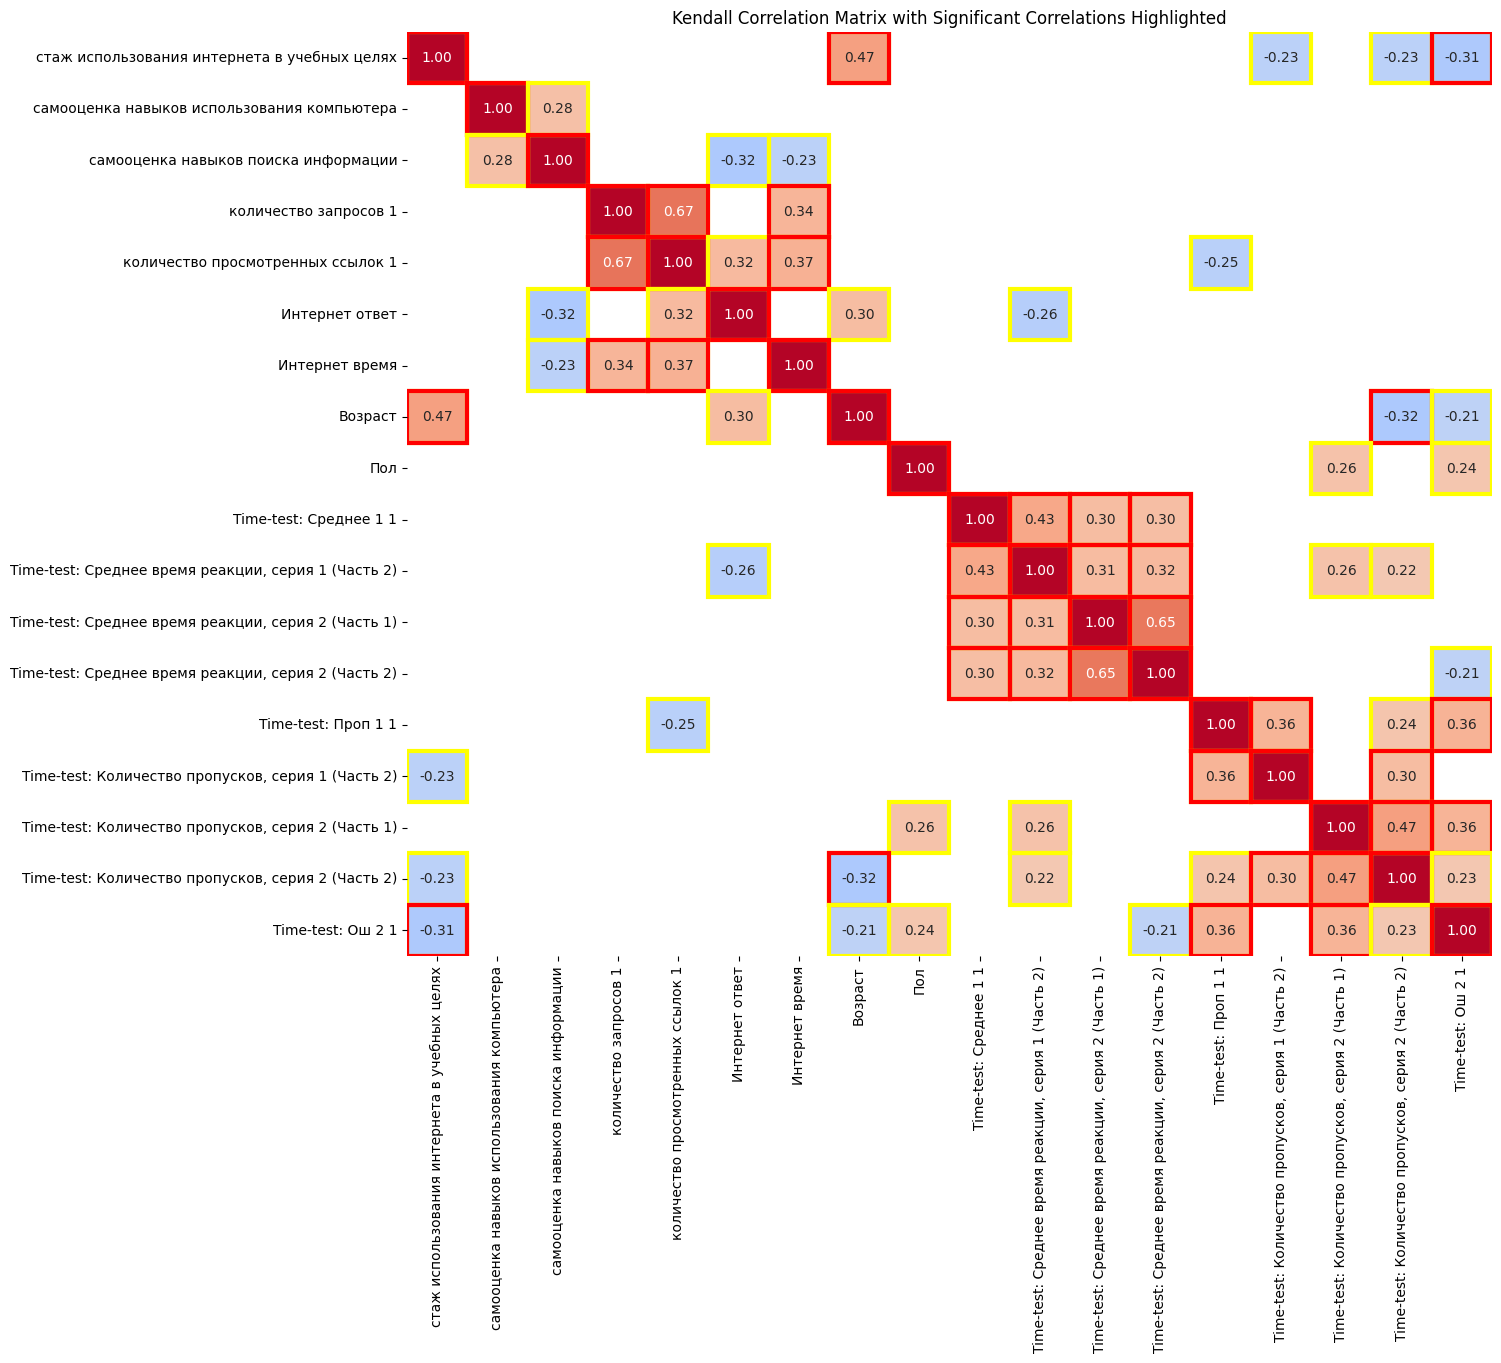

In [47]:
plt.figure(figsize=(14, 12))

# Создание маски для значений p-value
mask_significant = np.zeros_like(p_value_matrix, dtype=bool)
mask_significant[p_value_matrix < 0.05] = True

# Создание тепловой карты
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, mask=~mask_significant, cbar=False)

# Подсветка значимых корреляций
for i in range(len(variables)):
    for j in range(len(variables)):
        if p_value_matrix.iloc[i, j] < 0.05:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3))
        if p_value_matrix.iloc[i, j] < 0.01:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.title('Kendall Correlation Matrix with Significant Correlations Highlighted')
plt.savefig("/content/gdrive/My Drive/delite/beta/kendall_correlation_heatmap.png")
plt.show()


In [48]:
variables_x = [
    'стаж использования интернета в учебных целях', 'самооценка навыков использования компьютера',
    'самооценка навыков поиска информации', 'количество запросов 1', 'количество просмотренных ссылок 1',
    'Интернет ответ', 'Интернет время', 'Возраст'
]

variables_y = [
    'Time-test: Среднее 1 1', 'Time-test: Среднее время реакции, серия 1 (Часть 2)',
    'Time-test: Среднее время реакции, серия 2 (Часть 1)', 'Time-test: Среднее время реакции, серия 2 (Часть 2)',
    'Time-test: Проп 1 1', 'Time-test: Количество пропусков, серия 1 (Часть 2)',
    'Time-test: Количество пропусков, серия 2 (Часть 1)', 'Time-test: Количество пропусков, серия 2 (Часть 2)',
    'Time-test: Ош 2 1'
]


In [49]:
def calculate_kendall_correlation_matrix(data, variables_x, variables_y):
    corr_matrix = pd.DataFrame(index=variables_y, columns=variables_x)
    p_value_matrix = pd.DataFrame(index=variables_y, columns=variables_x)

    for var1 in variables_y:
        for var2 in variables_x:
            kendall_corr, kendall_p = kendalltau(data[var1], data[var2])
            corr_matrix.loc[var1, var2] = kendall_corr
            p_value_matrix.loc[var1, var2] = kendall_p

    corr_matrix = corr_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)
    return corr_matrix, p_value_matrix


In [50]:
corr_matrix, p_value_matrix = calculate_kendall_correlation_matrix(data, variables_x, variables_y)


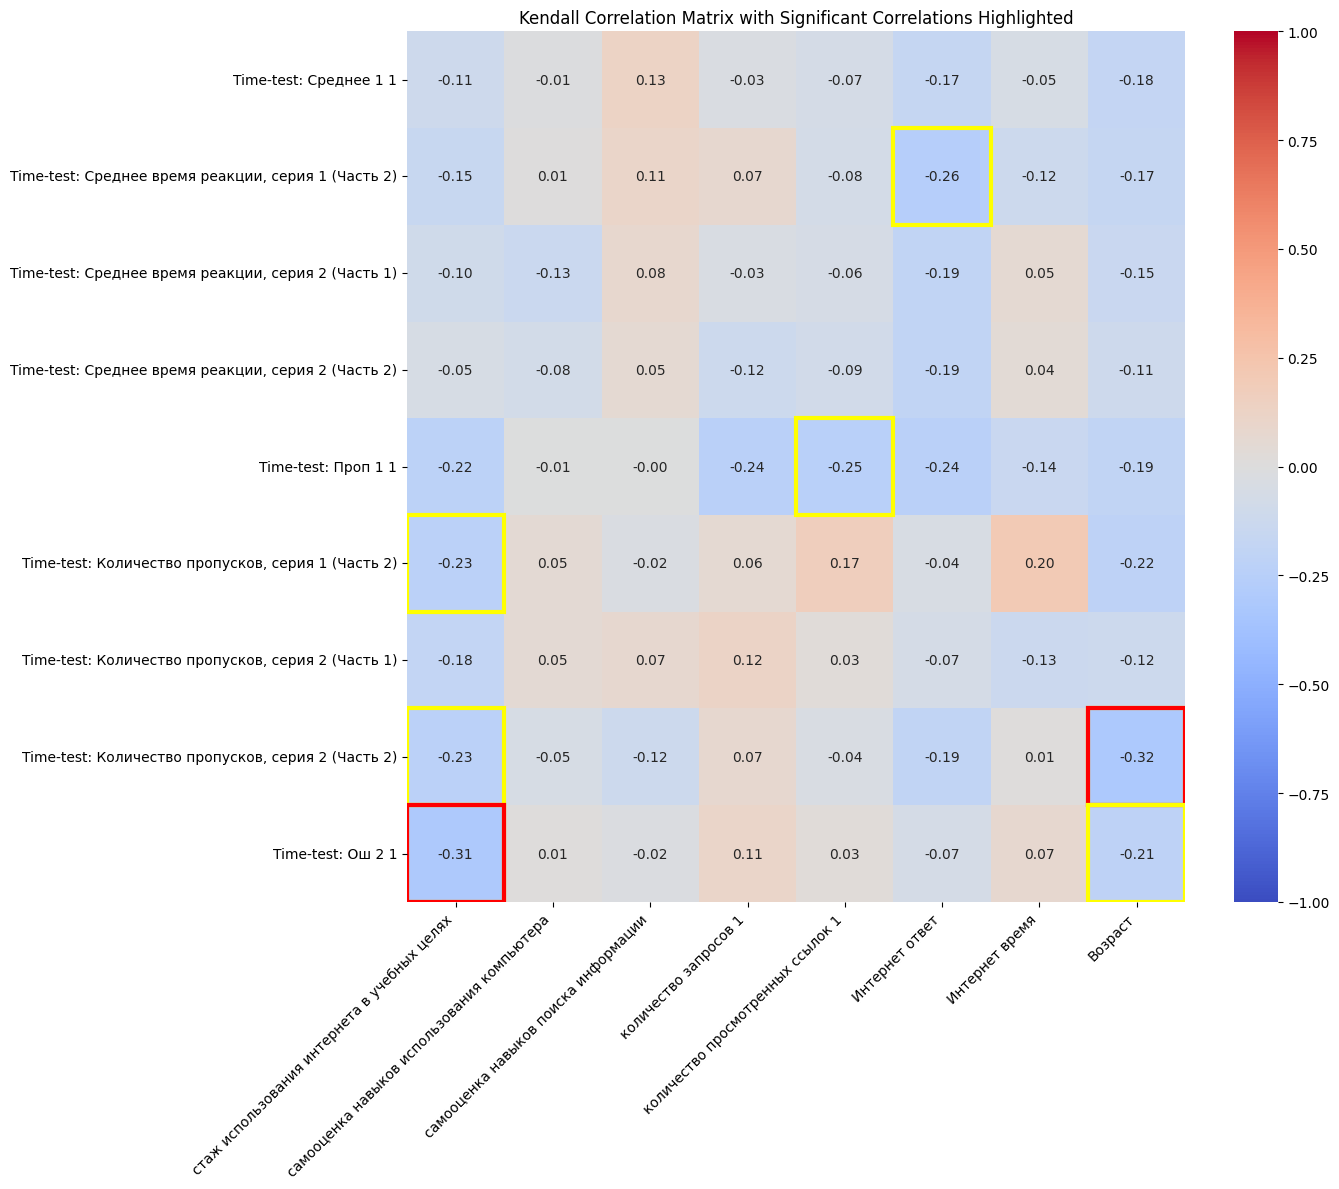

In [51]:
plt.figure(figsize=(14, 12))

# Создание тепловой карты
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

# Подсветка значимых корреляций
for i in range(len(variables_y)):
    for j in range(len(variables_x)):
        if p_value_matrix.iloc[i, j] < 0.05:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=3))
        if p_value_matrix.iloc[i, j] < 0.01:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.title('Kendall Correlation Matrix with Significant Correlations Highlighted')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("/content/gdrive/My Drive/delite/beta/kendall_correlation_heatmap.png")
plt.show()


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [ ]:
drive.mount('/content/gdrive')

file_path = "/content/gdrive/My Drive/delite/beta/egg_diploma.csv"
data = pd.read_csv(file_path)


In [53]:
variables = [
    'стаж использования интернета в учебных целях', 'самооценка навыков использования компьютера',
    'самооценка навыков поиска информации', 'количество запросов 1', 'количество просмотренных ссылок 1',
    'Интернет ответ', 'Интернет время', 'Возраст', 'Time-test: Среднее 1 1',
    'Time-test: Среднее время реакции, серия 1 (Часть 2)', 'Time-test: Среднее время реакции, серия 2 (Часть 1)',
    'Time-test: Среднее время реакции, серия 2 (Часть 2)', 'Time-test: Проп 1 1',
    'Time-test: Количество пропусков, серия 1 (Часть 2)', 'Time-test: Количество пропусков, серия 2 (Часть 1)',
    'Time-test: Количество пропусков, серия 2 (Часть 2)', 'Time-test: Ош 2 1'
]


In [54]:
# Заполнение пропусков средним значением
data = data[variables].dropna()

# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [55]:
# Иерархическая кластеризация
Z = linkage(data_scaled, method='ward')


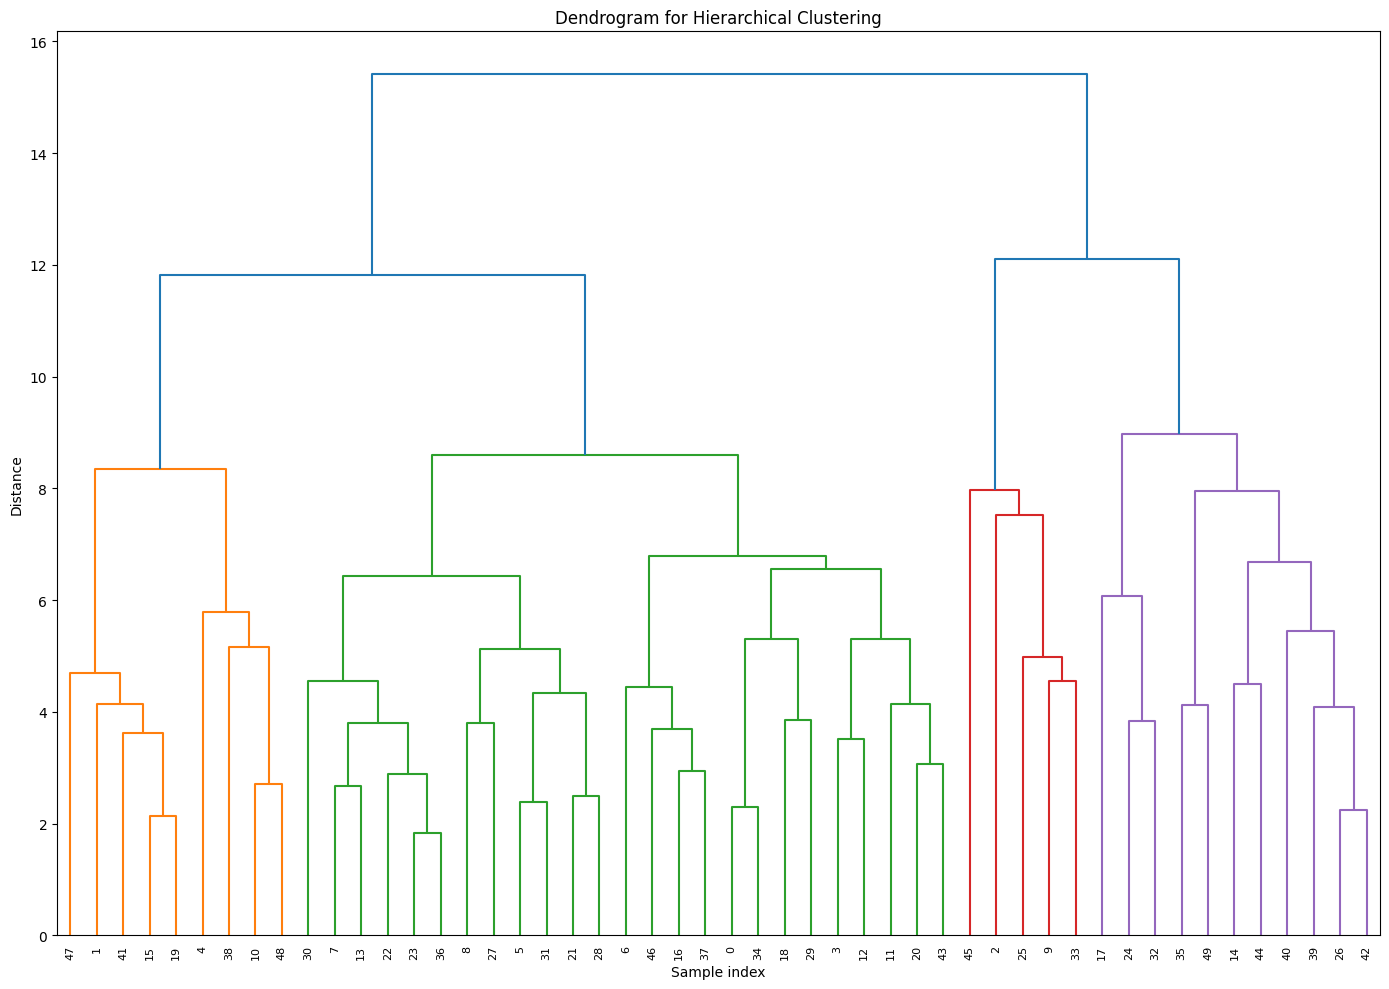

In [56]:
plt.figure(figsize=(14, 10))
dendrogram(Z, labels=data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig("/content/gdrive/My Drive/delite/beta/dendrogram.png")
plt.show()


In [57]:
# Определение кластеров, число кластеров можно выбрать исходя из дендрограммы
max_d = 10  # Пример, нужно выбрать на основе дендрограммы
clusters = fcluster(Z, max_d, criterion='distance')

data['Cluster'] = clusters

# Сохранение результатов на Google Drive
output_path_clusters = "/content/gdrive/My Drive/delite/beta/egg_diploma_clusters.csv"
data.to_csv(output_path_clusters, index=False)
